# Big Data 2_ 1일차 (0715)

In [3]:
import numpy as np
from scipy import stats
import pandas as pd
from sklearn.preprocessing import scale, minmax_scale, robust_scale
import statsmodels.api as sm
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_location = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
mpl.rc('font',family= font_name)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
df_fitness = pd.read_csv("/home/pirl/Statistics/Day3_0715/FITNESS.csv", engine = "python", encoding="CP949")
df_fitness.head()  

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,81.42,49.156,8.95,180,44,185


In [161]:
df_currency = pd.read_csv("/home/pirl/Statistics/Day3_0715/환율.csv", engine="python", parse_dates = ["APPL_DATE"])
df_currency.head()

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,2016-01-01,181.48,0.1541
1,JPY,2016-01-01,976.99,0.8294
2,USD,2016-01-01,1178.00,1.0000
3,CNY,2016-01-02,181.48,0.1541
4,JPY,2016-01-02,976.99,0.8294


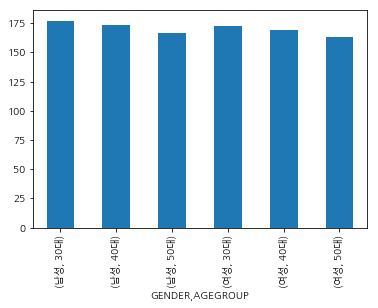

In [170]:
df_fitness_runtime = df_fitness.groupby(['GENDER','AGEGROUP'])['RUNPULSE'].agg("mean")

df_fitness_runtime.plot.bar()

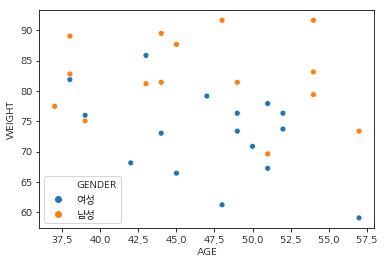

In [171]:
sns.scatterplot(x='AGE', y='WEIGHT', hue='GENDER', data = df_fitness)

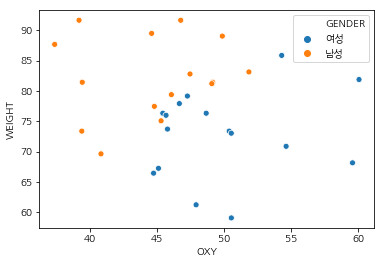

In [200]:
#
sns.scatterplot(x='OXY', y='WEIGHT', hue='GENDER', data = df_fitness)


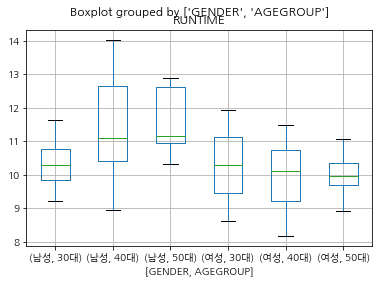

In [201]:
df_fitness.boxplot(column="RUNTIME", by=['GENDER','AGEGROUP'])

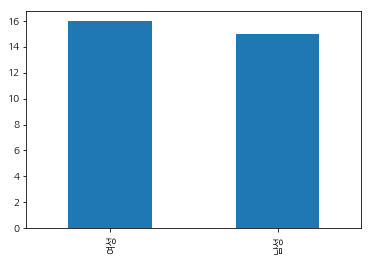

In [28]:
df_count = df_fitness["GENDER"].value_counts()
df_count.plot.bar()

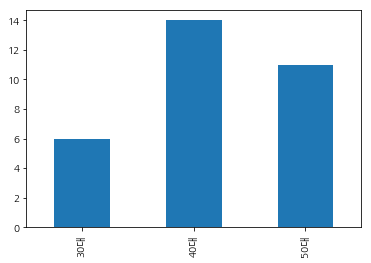

In [29]:
df_count = df_fitness["AGEGROUP"].value_counts()
df_count.sort_index(inplace=True)
df_count.plot.bar()

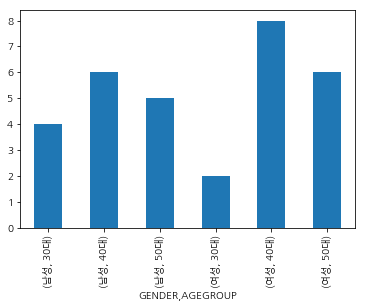

In [31]:
df_groupby_total = df_fitness.groupby(['GENDER', 'AGEGROUP'], as_index = False).size()
df_groupby_total.plot.bar()

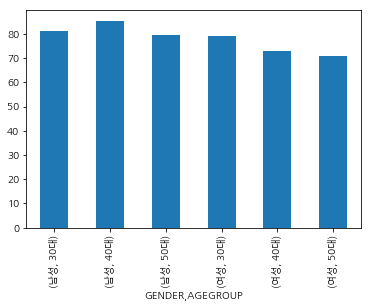

In [36]:
df_groupby_total = df_fitness.groupby(['GENDER', 'AGEGROUP'])['WEIGHT'].agg("mean")
df_groupby_total.plot.bar()

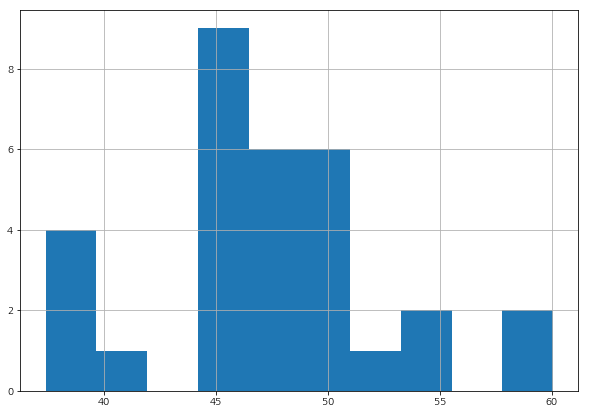

In [40]:
df_fitness['OXY'].hist(figsize =(10,7))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe69fdf3898>,
      dtype=object)

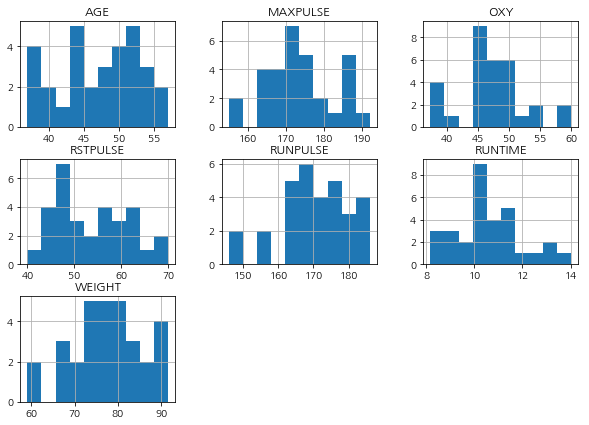

In [45]:
df_fitness.hist(figsize =(10,7))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe69f80e9b0>,
      dtype=object)

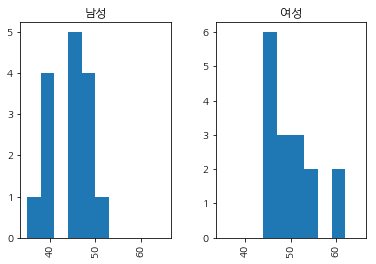

In [46]:
df_fitness.hist(column ="OXY",by="GENDER", range=(35,65))

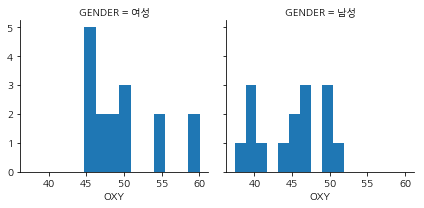

In [49]:
grid = sns.FacetGrid(df_fitness, col='GENDER')
grid.map(plt.hist,"OXY")

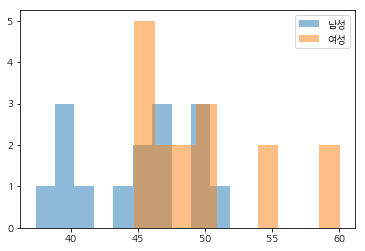

In [51]:
plt.hist(df_fitness[df_fitness["GENDER"]=="남성"]["OXY"],label="남성", alpha=0.5)
plt.hist(df_fitness[df_fitness["GENDER"]=="여성"]["OXY"],label="여성", alpha=0.5)
plt.legend()

(array([1., 3., 0., 1., 0., 0., 5., 4., 4., 2., 2., 4., 1., 0., 1., 1., 0.,
        0., 0., 2.]),
 array([37.388  , 38.52135, 39.6547 , 40.78805, 41.9214 , 43.05475,
        44.1881 , 45.32145, 46.4548 , 47.58815, 48.7215 , 49.85485,
        50.9882 , 52.12155, 53.2549 , 54.38825, 55.5216 , 56.65495,
        57.7883 , 58.92165, 60.055  ]),
 <a list of 20 Patch objects>)

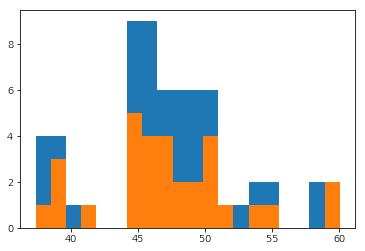

In [57]:
plt.hist(x="OXY", data=df_fitness)
plt.hist(x="OXY", data=df_fitness, bins=20)

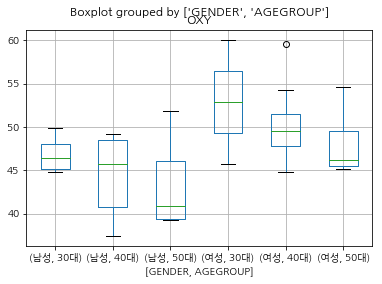

In [61]:
df_fitness.boxplot(column = "OXY", by=["GENDER","AGEGROUP"])

In [204]:
df_count = df_fitness.groupby(["GENDER"]).size()
df_count.plot.pie(y='OXY', autopct="%.1f)

SyntaxError: EOL while scanning string literal (<ipython-input-204-a1259c7a7656>, line 2)

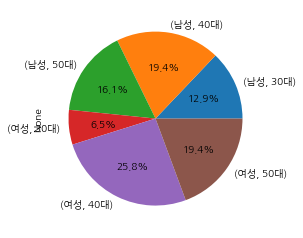

In [216]:
df_count = df_fitness.groupby(["GENDER","AGEGROUP"]).size()
df_count.plot.pie(y='OXY', autopct="%.1f%%")

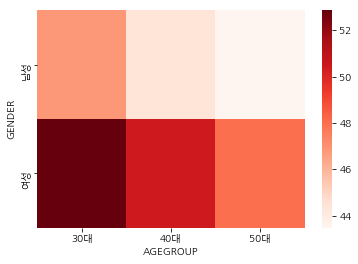

In [239]:
df_agg = df_fitness.groupby(["GENDER","AGEGROUP"], as_index=False).agg("mean")
df_agg

df_pivot=df_agg.pivot("GENDER","AGEGROUP","OXY")

sns.heatmap(df_pivot, cmap="Reds")

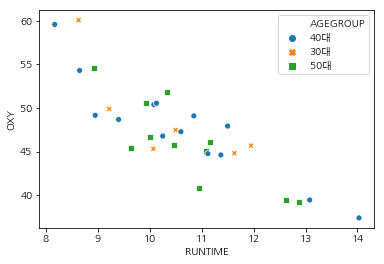

In [190]:
sns.scatterplot(x="RUNTIME" , y="OXY", hue = "AGEGROUP", style="AGEGROUP",data=df_fitness)

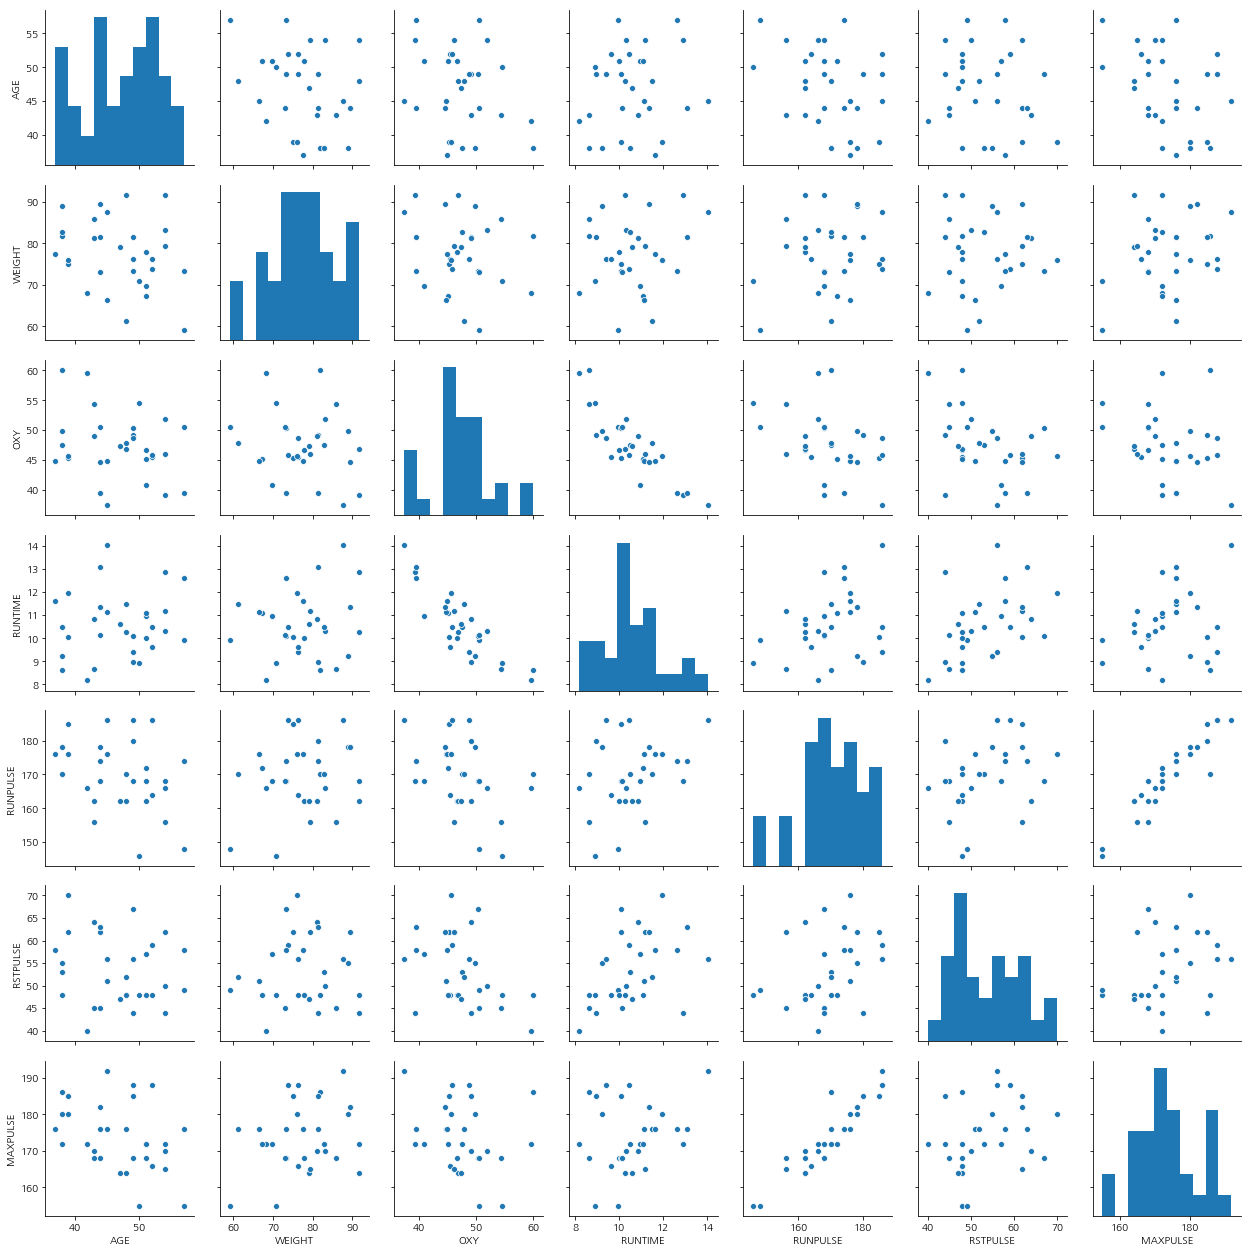

In [82]:
sns.pairplot(df_fitness).figsize = (10,5)

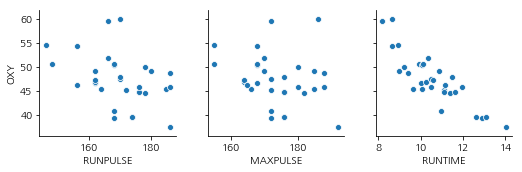

In [83]:
sns.pairplot(df_fitness, y_vars=['OXY'],x_vars=["RUNPULSE","MAXPULSE","RUNTIME"])

In [85]:
df_currency_pivot = df_currency.pivot(index="APPL_DATE",columns="CURRENCY", values="STD_RATE")
df_currency_pivot.head()

CURRENCY,CNY,JPY,USD
APPL_DATE,,,
2016-01-01,181.48,976.99,1178.0
2016-01-02,181.48,976.99,1178.0
2016-01-03,181.48,976.99,1178.0
2016-01-04,181.10,992.62,1184.0
2016-01-05,181.94,993.00,1185.0


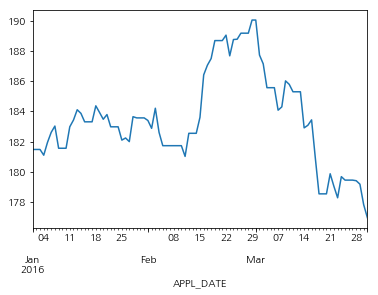

In [88]:
df_currency_pivot['CNY'].plot()

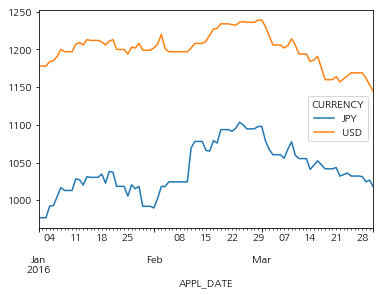

In [93]:
df_currency_pivot[['JPY',"USD"]].plot()

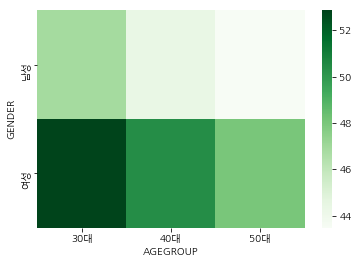

In [104]:
df_agg = df_fitness.groupby(["GENDER","AGEGROUP"], as_index=False).agg("mean")
df_pivot = df_agg.pivot("GENDER","AGEGROUP","OXY")
sns.heatmap(df_pivot,cmap="Greens")

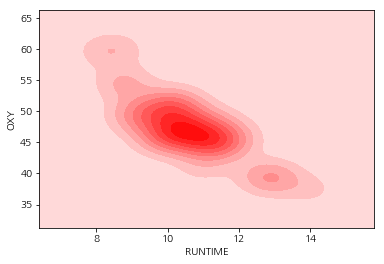

In [114]:
sns.kdeplot(df_fitness["RUNTIME"], df_fitness["OXY"], color ="red",shade= True)

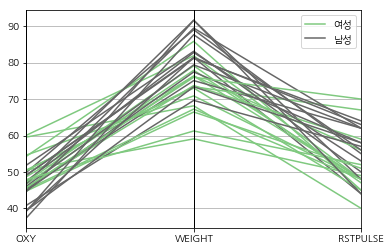

In [117]:
pd.plotting.parallel_coordinates(df_fitness, "GENDER", cols=["OXY","WEIGHT","RSTPULSE"], 
                                 colormap="Accent")

(array([4., 1., 0., 9., 6., 6., 1., 2., 0., 2.]),
 array([37.388 , 39.6547, 41.9214, 44.1881, 46.4548, 48.7215, 50.9882,
        53.2549, 55.5216, 57.7883, 60.055 ]),
 <a list of 10 Patch objects>)

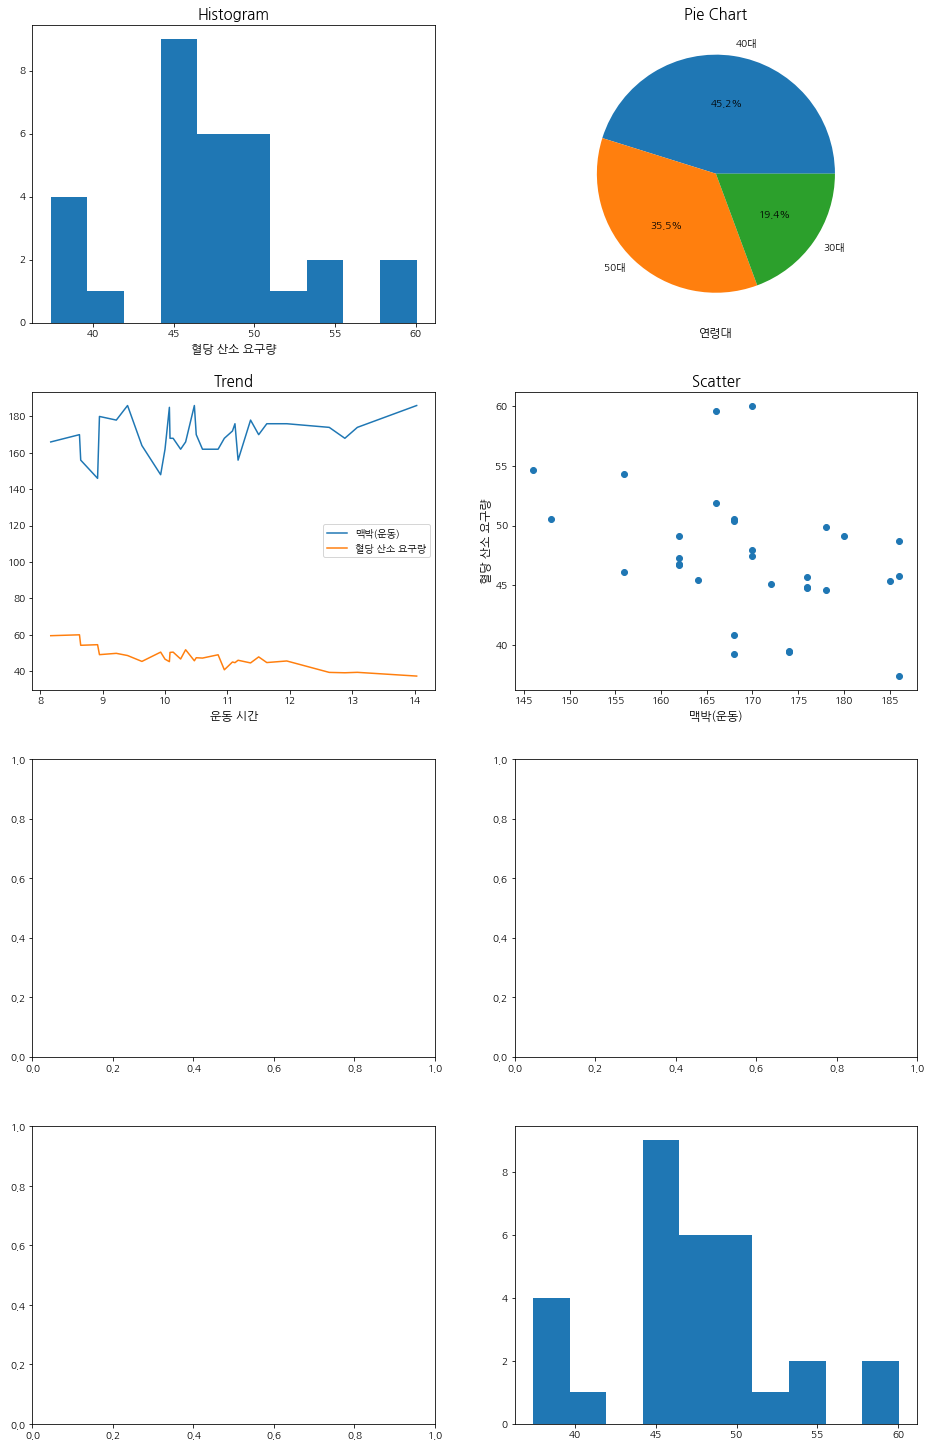

In [215]:
df_count = df_fitness["AGEGROUP"].value_counts()
fig, axes = plt.subplots(nrows=4, ncols=2, figsize =(13,20))
plt.tight_layout(w_pad=5, h_pad=5)

#
axes[0,0].hist(df_fitness["OXY"])
axes[0,0].set_title("Histogram", fontsize=15)
axes[0,0].set_xlabel("혈당 산소 요구량", fontsize=12)

#
axes[0,1].pie(df_count, labels=df_count.index.tolist(),autopct="%.1f%%")
axes[0,1].set_title("Pie Chart", fontsize=15)
axes[0,1].set_xlabel("연령대",fontsize=12)
#
axes[1,0].plot('RUNTIME', 'RUNPULSE', data=df_fitness,label="맥박(운동)")
axes[1,0].plot('RUNTIME', 'OXY', data=df_fitness, label="혈당 산소 요구량")
axes[1,0].set_title("Trend", fontsize=15)
axes[1,0].set_xlabel("운동 시간", fontsize=12)
axes[1,0].legend()

#
axes[1,1].scatter("RUNPULSE", "OXY", data=df_fitness)
axes[1,1].set_title("Scatter", fontsize=15)
axes[1,1].set_xlabel("맥박(운동)", fontsize=12)
axes[1,1].set_ylabel("혈당 산소 요구량", fontsize=12)

#
plt.hist(df_fitness["OXY"])
